In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from cat import Cat

In [2]:
MAXROW = 20
MAXCOL = 30

In [3]:
def processline(linelist):
    newlist = [(int(l.split(",")[0]),int(l.split(",")[1])) for l in linelist[1:]]
    return newlist
    
def read_data(filename):
    file = open(filename,'r')
    data = file.readlines()
    lists = []
    for line in data:
        new_list = processline(line.split(":"))
        lists.append(new_list)
    foodlist = lists [0]
    waterlist = lists [1]
    bedlist = lists [2]
    boxlist = lists [3]
    poisonlist = lists [4]
    return foodlist, waterlist, bedlist, boxlist, poisonlist

def move_em(current, moves):
    nextgrid = np.zeros(current.shape, dtype="int16")
    
    for row in range(MAXROW):
        for col in range(MAXCOL):
            for g in range(current[row,col]):
                nextrow = row + random.choice(moves)
                nextcol = col + random.choice(moves)
                #print("Newpos = ", nextrow, nextcol)
                if nextrow < 0:
                    nextrow = 0
                if nextcol < 0:
                    nextcol = 0
                if nextrow >= MAXROW:
                    nextrow = MAXROW - 1
                if nextcol >= MAXCOL:
                    nextcol = MAXCOL - 1
                nextgrid[nextrow, nextcol] += 1
    return nextgrid

def rule1(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] -= 1
                    marksList.append(-5)
                    print("OUT")
                    
def rule2(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] += 1
                    marksList.append(5)
                    print("BOOST")
            

def make_feature_scatter(itemlist, data, colour):
    xlist = []
    ylist = []
    for r,c in itemlist:
        ylist.append(MAXROW - r - 1)  
        xlist.append(c) 
    data.append([str(xlist), str(ylist)])
    plt.scatter(xlist,ylist,color=colour, marker='s')
    
def make_my_scatter(pop, data, colour):
    xlist = []
    ylist = []
    slist = []
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if pop[row,col] > 0:
                ylist.append(MAXROW - row - 1)  
                xlist.append(col) 
                slist.append(pop[row,col]*20)
    data.append([str(xlist), str(ylist)])
    plt.scatter(xlist,ylist,s=slist,color=colour, marker='*')

In [4]:
def ask_questions(questions):
    try:
        cats = []
        answerList=[]

        for i in range(4):
            for question in questions:
                answer = input(question)
                answerList.append(answer)
            if(answerList[1].upper()=="M"):
                cats.append(Cat(answerList[0], "Male", answerList[2]))
            elif(answerList[1].upper()=="F"):
                cats.append(Cat(answerList[0], "Female", answerList[2]))
            answerList.clear()
            loop=-1
        return cats
     except:
            print("An exception occurred")

In [5]:
def main():
    print("\n**********WELCOME TO GAME OF CATS**********\n ")
    
    questions = [
     "Cat name?\n",
     "Cat gender?\n(M) Male \n(F) Female\n",
     "Age of each cat?\n"
    ]
    
    catList = ask_questions(questions)
    
    food, water, bed, boxes, poison = read_data("cat.txt") 
    
    catarray1 = np.zeros((MAXROW,MAXCOL), dtype="int16")
    catarray2= np.zeros((MAXROW,MAXCOL), dtype="int16")
    catarray3 = np.zeros((MAXROW,MAXCOL), dtype="int16")
    catarray4 = np.zeros((MAXROW,MAXCOL), dtype="int16")
    
    catarray1[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
    catarray2[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
    catarray3[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
    catarray4[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
    
    data = []
    
    marksList1 = []
    marksList2 = []
    marksList3 = []
    marksList4 = []

    # Simulation
    for t in range(30):
        try:
            goodnext1 = move_em(catarray1, [-1,0,1])
            goodnext2= move_em(catarray2, [-1,0,1])
            goodnext3 = move_em(catarray3, [-1,0,1])
            goodnext4 = move_em(catarray4, [-1,0,1])
            
            rule1(goodnext1, poison, marksList1)
            rule1(goodnext1, bed, marksList1)
            rule1(goodnext1, boxes, marksList1)
            rule2(goodnext1, water, marksList1)
            rule2(goodnext1, food, marksList1)
            
            rule1(goodnext2, poison, marksList2)
            rule1(goodnext2, bed, marksList2)
            rule1(goodnext2, boxes, marksList2)
            rule2(goodnext2, water, marksList2)
            rule2(goodnext2, food, marksList2)
            
            rule1(goodnext3, poison, marksList3)
            rule1(goodnext3, bed, marksList3)
            rule1(goodnext3, boxes, marksList3)
            rule2(goodnext3, water, marksList3)
            rule2(goodnext3, food, marksList3)
            
            rule1(goodnext4, poison, marksList4)
            rule1(goodnext4, bed, marksList4)
            rule1(goodnext4, boxes, marksList4)
            rule2(goodnext4, water, marksList4)
            rule2(goodnext4, food, marksList4)

            catarray1 = goodnext1
            catarray2 = goodnext2
            catarray3 = goodnext3
            catarray4 = goodnext4

            make_my_scatter(catarray1, data, "#58CCED")
            make_my_scatter(catarray2, data, "#3895D3")
            make_my_scatter(catarray3, data, "#1261A0")
            make_my_scatter(catarray4, data, "#072F5F")
            
            make_feature_scatter(water, data, "c")
            make_feature_scatter(bed, data, "y")
            make_feature_scatter(poison, data, "r")
            make_feature_scatter(food, data, "g")
            
            plt.title("Cat Simulation (time = " + str(t) + ")")
            plt.xlabel("Columns")
            plt.ylabel("Rows")
            plt.xlim(-1,MAXCOL)
            plt.ylim(-1,MAXROW)
            plt.savefig('Cat Simulation.png')
            plt.pause(1)
            plt.clf()
            
        except:
              print("An exception occurred")
                
    score_list = [sum(marksList1), sum(marksList2), sum(marksList3), sum(marksList4)]
    max_score = max(score_list)
    max_index = score_list.index(max_score)
    
    data = np.array(data)
    np.savetxt('Data.csv', data, fmt="%s", delimiter=',')
    
    print("\n**********WON THE GAME**********")
    print(catList[max_index].description())
    print("CAT SCORE {}\n".format(max_score))


**********WELCOME TO GAME OF CATS**********
 
Cat name?
m
Cat gender?
(M) Male 
(F) Female
m
Age of each cat?
m
Cat name?
m
Cat gender?
(M) Male 
(F) Female
m
Age of each cat?
m
Cat name?
m
Cat gender?
(M) Male 
(F) Female
m
Age of each cat?
m
Cat name?
m
Cat gender?
(M) Male 
(F) Female
m
Age of each cat?
m
BOOST


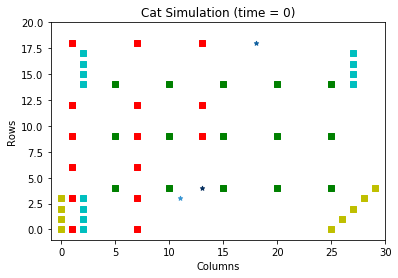

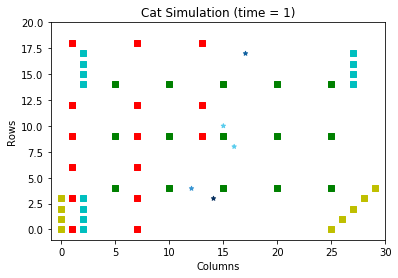

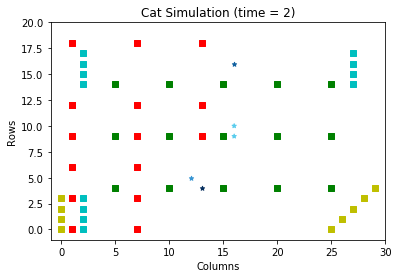

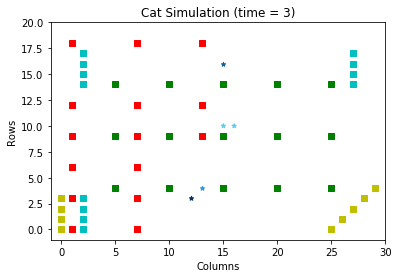

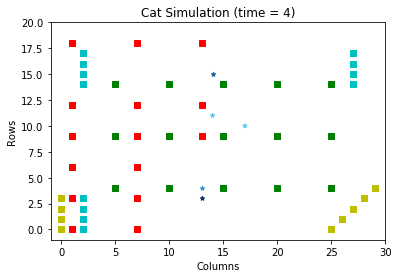

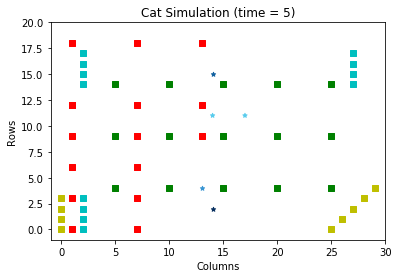

BOOST


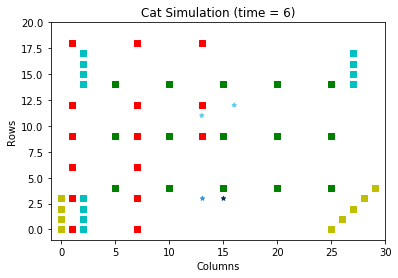

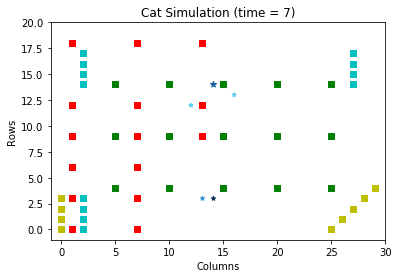

BOOST


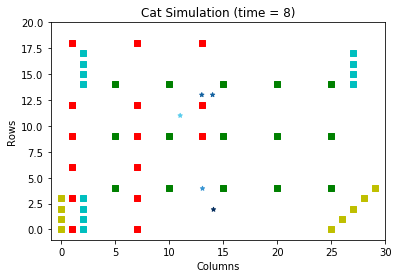

OUT


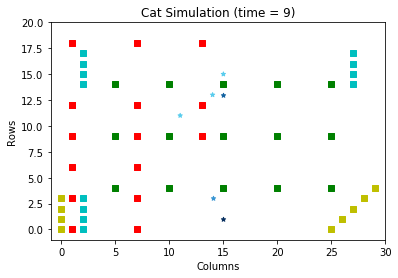

BOOST


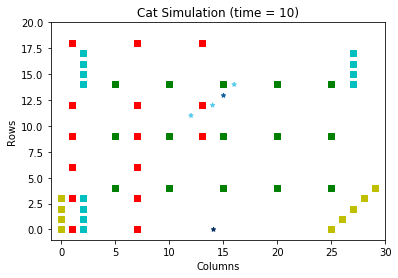

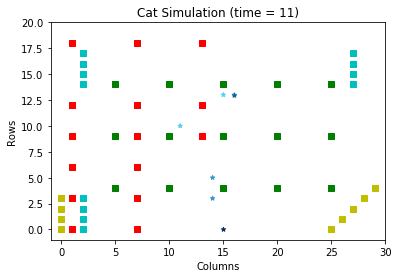

BOOST


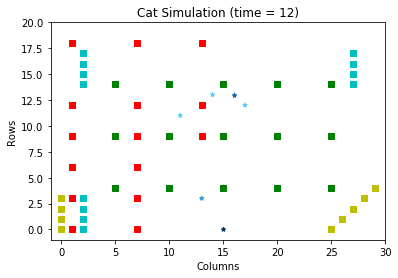

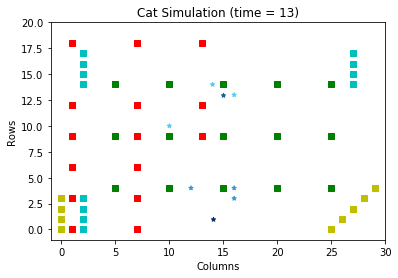

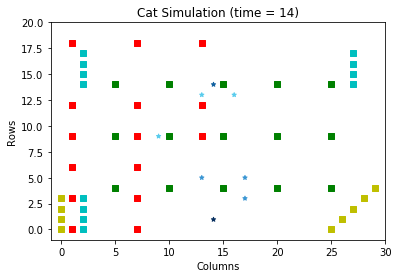

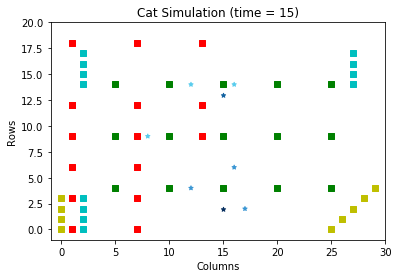

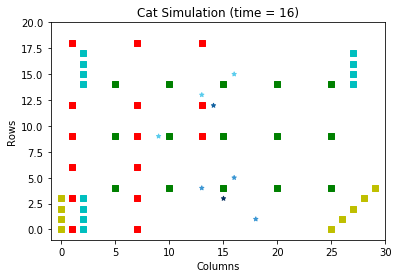

OUT


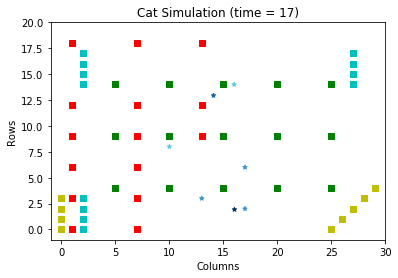

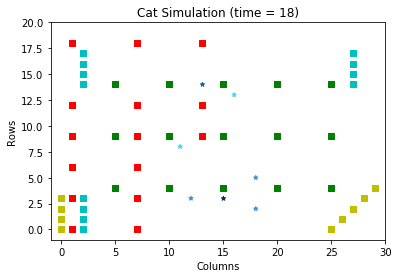

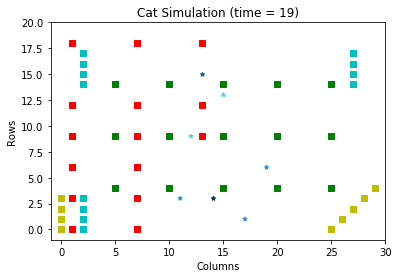

BOOST


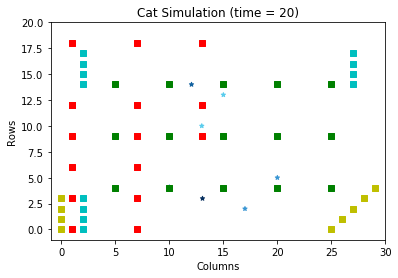

BOOST


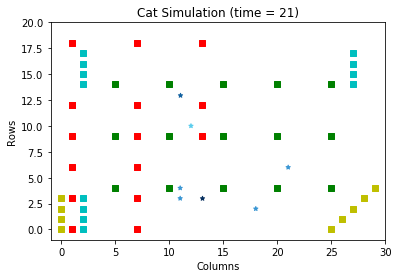

BOOST


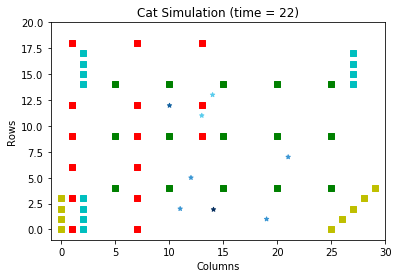

BOOST


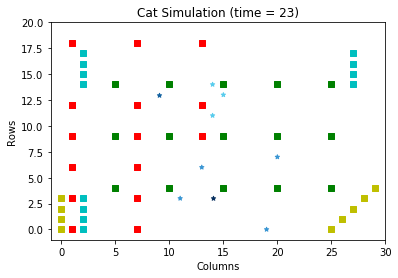

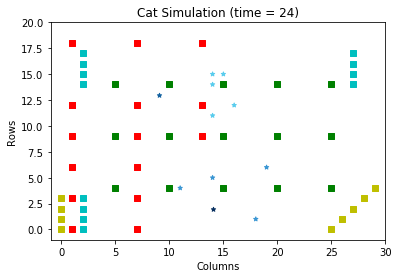

BOOST


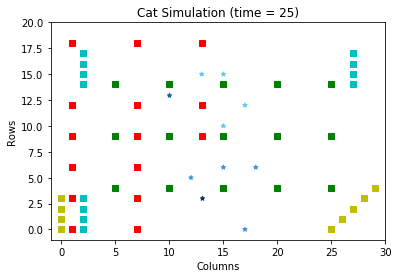

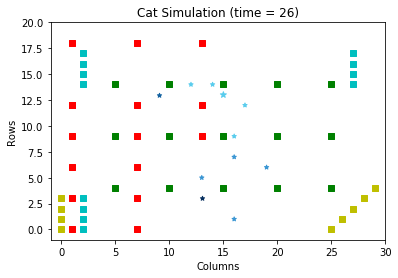

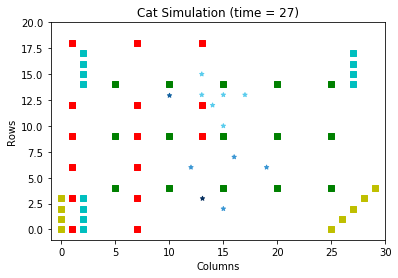

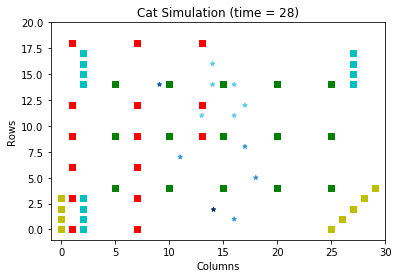

OUT


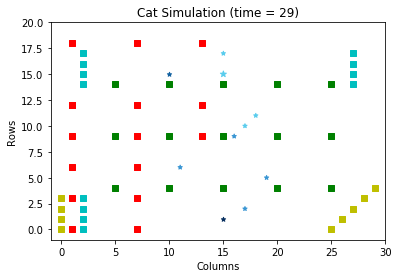


**********WON THE GAME**********
m is m years old. m is male cat.
CAT SCORE 20



<Figure size 432x288 with 0 Axes>

In [6]:
if __name__ == "__main__":
    main()